Atindra Jayakar ML Lab 6

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### KNN algorithm on dataset 1

In [90]:
data = [(-1,1),(0,1),(0,2),(1,-1),(1,0),(1,2),(2,2),(2,3)]
labels = ['N','P','N','N','P','P','N','P']

In [91]:
train_data = pd.DataFrame({'Data':data,'Class':labels})
train_data

,Data,Class
0,"(-1, 1)",N
1,"(0, 1)",P
2,"(0, 2)",N
3,"(1, -1)",N
4,"(1, 0)",P
5,"(1, 2)",P
6,"(2, 2)",N
7,"(2, 3)",P


In [92]:
def euclidean(coord1, coord2):
  return np.sqrt(pow((coord1[0] - coord2[0]),2) + pow((coord1[1] - coord2[1]),2))

In [93]:
print(euclidean(train_data.Data[0],(1,1)))

2.0


In [94]:
test_point = (-1,1)
def calc_distances(test_point,train_data):
  li = []
  for data in train_data.Data:
    li.append(euclidean(test_point,data))
  train_data['Distances'] = li
  train_data.sort_values(by=['Distances'],inplace=True)

In [95]:
def nearest_neigbiours(df,k):
  part = df[:k]
  return part.value_counts('Class').idxmax()

In [96]:
# train_data.sort_values(by=['Distances'],inplace=True)
# train_data

In [97]:
nearest_neigbiours(train_data,3)

'N'

In [98]:
print(f'Thus this point is classified as {nearest_neigbiours(train_data,3)}')

Thus this point is classified as N


##### Task 1 on alternate dataset

In [99]:
def euclidean(coord1a, coord1b, coord2):
  return np.sqrt((pow((coord1a - coord2[0]),2) + pow((coord1b - coord2[1]),2)))

In [100]:
def calc_distances(test_point,train_data):
  li = []
  item1,item2,class_label = list(train_data.columns)
#   print (item1)
  for i in range(len(test_data[item1])):
    li.append(euclidean(train_data[item1][i],train_data[item2][i],test_point))
  train_data['Distances'] = li
  train_data.sort_values(by=['Distances'],inplace=True)

In [101]:
def nearest_neigbiours(df,k):
  part = df[:k]
  print(part)
  return part.value_counts('c').idxmax()

In [102]:
test_data = pd.read_csv('test_knn.csv')
test_data

,a,b,c
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


In [103]:
item1,item2,item3 = list(test_data.columns)


In [104]:
item1,item2,class_label = list(test_data.columns)
# print (item1)
for i in range(len(test_data[item1])):
  print(test_data[item1][i],test_data[item2][i])

2.7810836 2.550537003
1.465489372 2.362125076
3.396561688 4.400293529
1.38807019 1.850220317
3.06407232 3.005305973
7.627531214 2.759262235
5.332441248 2.088626775
6.922596716 1.77106367
8.675418651 -0.242068655
7.673756466 3.508563011


In [105]:
test_point = (-1,1)
calc_distances(test_point,train_data=test_data)

In [106]:
print(f'Thus this point is classified as {nearest_neigbiours(test_data,k=3)[0]} class')

          a         b  c  Distances
3  1.388070  1.850220  0   2.534907
1  1.465489  2.362125  0   2.816740
0  2.781084  2.550537  0   4.086656
Thus this point is classified as 0 class


Thus, we have successfully calsified the given test point using 3NN 

### KNN on Social Network Dataset

##### Basic Exploratory Data Analysis

In [107]:
social_data = pd.read_csv('Social_Network_Ads.csv')
social_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [108]:
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [109]:
social_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [110]:
social_data.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

We can conclude that columns 'User Id' will not be applicable for classification.

In [111]:
X = social_data.drop(['User ID','Purchased'],axis=1)
X.head(5)

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [112]:
y = social_data.drop(['Gender','Age','EstimatedSalary','User ID'],axis=1)
y.head(5)

,Purchased
0,0
1,0
2,0
3,0
4,0


##### Data Splitting into train and test set

In [113]:
from sklearn.model_selection import train_test_split
# from sklearn

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state = 0)

In [115]:
X_train.head(5)

,Gender,Age,EstimatedSalary
336,Male,58,144000
64,Female,59,83000
55,Female,24,55000
106,Female,26,35000
300,Female,58,38000


##### Data Preprocessing 

In [116]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

In [117]:
label_encoder = LabelEncoder()

In [118]:
gender = X_train['Gender'].unique()
gender

array(['Male', 'Female'], dtype=object)

In [119]:
X_train['Gender']= label_encoder.fit_transform(X_train['Gender'])
X_train['Gender'].unique()

<ipython-input-119-48457f57e8e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Gender']= label_encoder.fit_transform(X_train['Gender'])


array([1, 0])

In [120]:
X_train = X_train[X_train['Age'] > 0]
X_train['Age'].unique()

array([58, 59, 24, 26, 42, 40, 46, 41, 37, 23, 25, 27, 48, 44, 32, 38, 52,
       53, 39, 36, 35, 47, 49, 45, 31, 60, 29, 28, 33, 20, 51, 57, 21, 30,
       43, 18, 22, 56, 19, 50, 34, 54, 55], dtype=int64)

##### Data Standardisation and Normalisation

In [121]:
sscalar = StandardScaler()
mmscalar = MinMaxScaler()
X_train['EstimatedSalary']=mmscalar.fit_transform(X=np.array(X_train['EstimatedSalary']).reshape(-1,1))
X_train['Age']=mmscalar.fit_transform(X=np.array(X_train['Age']).reshape(-1,1))
X_train.head()

,Gender,Age,EstimatedSalary
336,1,0.952381,0.955556
64,0,0.976190,0.503704
55,0,0.142857,0.296296
106,0,0.190476,0.148148
300,0,0.952381,0.170370


##### Applying KNN Classification Model

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,np.array(y_train).ravel())

KNeighborsClassifier(n_neighbors=3)

In [124]:
model.score(X_train,y_train)

0.91875

##### For test data

In [125]:
X_test['Gender']= label_encoder.fit_transform(X_test['Gender'])
X_test['Gender'].unique()

<ipython-input-125-eb8fcac16250>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Gender']= label_encoder.fit_transform(X_test['Gender'])


array([1, 0])

In [126]:
X_test = X_test[X_test['Age'] > 0]
X_test['Age'].unique()

array([30, 38, 35, 27, 31, 36, 18, 47, 28, 37, 39, 20, 32, 19, 55, 41, 23,
       49, 29, 21, 57, 24, 22, 34, 43, 52, 26, 59, 45, 60, 40, 42, 53],
      dtype=int64)

In [127]:
sscalar = StandardScaler()
mmscalar = MinMaxScaler()
X_test['EstimatedSalary']=mmscalar.fit_transform(X=np.array(X_test['EstimatedSalary']).reshape(-1,1))
X_test['Age']=mmscalar.fit_transform(X=np.array(X_test['Age']).reshape(-1,1))
X_test.head()

,Gender,Age,EstimatedSalary
132,1,0.285714,0.533333
309,0,0.476190,0.259259
341,1,0.404762,0.444444
196,0,0.285714,0.474074
246,0,0.404762,0.259259


In [128]:
model.score(X_test,y_test)

0.95

In [129]:
# kd_tree, ball_tree read docs to improve knn
# https://scikit-learn.org/stable/modules/preprocessing.html --- best docs 

##### Evaluation of KNN Classification Model

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score

accuracy = accuracy_score(y_test,model.predict(X_test))
print(accuracy)

0.95


In [135]:
cmatrix = confusion_matrix(y_test,model.predict(X_test)) 
cmatrix

array([[55,  3],
       [ 1, 21]], dtype=int64)

##### Accuracy for different k-values

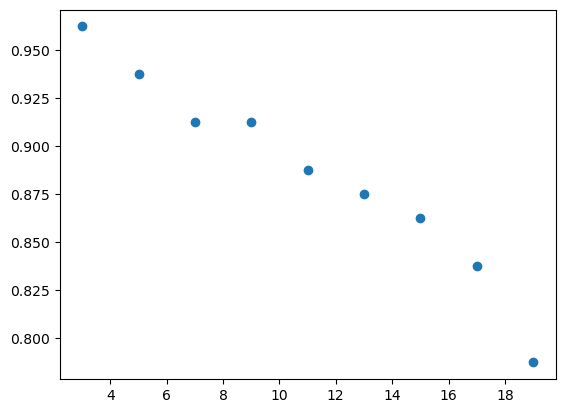

In [145]:
scores = []
values = np.arange(3,20,2)
for i in range(3,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_test,np.array(y_test).ravel())
    scores.append(model.score(X_test,y_test))
plt.scatter(values,scores)
plt.show();

We can see that as we increase the k-value from 3 to 20 the accuracy of the model is dropping. 

In [56]:
!jt -r

Reset css and font defaults in:
C:\Users\atind\.jupyter\custom &
C:\Users\atind\AppData\Roaming\jupyter\nbextensions
